In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2
import random
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
# dataset link - https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [4]:
DATADIR = "../kagglecatsanddogs/PetImages"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 50

In [2]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass   

In [18]:
create_training_data()

In [22]:
# shuffle data
random.shuffle(training_data)

In [53]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
    
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
y_train = np.array(y_train)

In [54]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [5]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

## Model & Training

In [6]:
# normalize/scale data
X_train = X_train/255.0 

In [7]:
# create model
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X_train.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(65, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [64]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [65]:
model.fit(X_train, y_train, 
          batch_size=32, 
          epochs=5, 
          validation_split=0.1,
          callbacks=[early_stop])

Epoch 1/5
702/702 [==============================] - 46s 65ms/step - loss: 0.4237 - accuracy: 0.8030 - val_loss: 0.4465 - val_accuracy: 0.7840
Epoch 2/5
702/702 [==============================] - 46s 66ms/step - loss: 0.3910 - accuracy: 0.8215 - val_loss: 0.4507 - val_accuracy: 0.7872
Epoch 3/5
702/702 [==============================] - 45s 64ms/step - loss: 0.3611 - accuracy: 0.8389 - val_loss: 0.4386 - val_accuracy: 0.7928
Epoch 4/5
702/702 [==============================] - 45s 64ms/step - loss: 0.3288 - accuracy: 0.8546 - val_loss: 0.4417 - val_accuracy: 0.8008
Epoch 5/5
702/702 [==============================] - 46s 66ms/step - loss: 0.2979 - accuracy: 0.8704 - val_loss: 0.4674 - val_accuracy: 0.7972


In [66]:
model.save('cnn_model.h5')

## Evaluation

In [67]:
model_loss = pd.DataFrame(model.history.history)

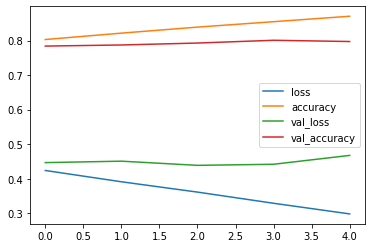

In [68]:
model_loss.plot()

## Predicting on new data

In [69]:
dog_path = os.path.join(DATADIR, "Dog", "67.jpg")
cat_path = os.path.join(DATADIR, "Cat", "38.jpg")

cat_img = cv2.imread(cat_path, cv2.IMREAD_GRAYSCALE)
cat_img = cv2.resize(cat_img, (IMG_SIZE, IMG_SIZE))

dog_img = cv2.imread(dog_path, cv2.IMREAD_GRAYSCALE)
dog_img = cv2.resize(dog_img, (IMG_SIZE, IMG_SIZE))

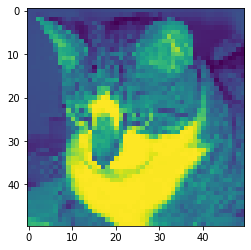

In [70]:
plt.imshow(cat_img)

In [71]:
cat_img = np.array(cat_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
cat_img = cat_img / 255.0

In [72]:
model.predict(cat_img)

array([[0.9949572]], dtype=float32)

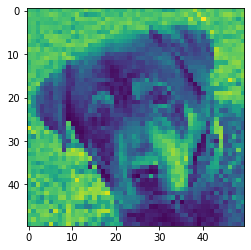

In [73]:
plt.imshow(dog_img)

In [56]:
dog_img = np.array(dog_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
dog_img = dog_img / 255.0

In [57]:
model.predict(dog_img)

array([[0.02474424]], dtype=float32)